# Atari Games

This workbook uses the same techniques as in previous one on MNIST

Documentation for datasets can be found [here](https://gymnasium.farama.org/environments/atari/).

The full code is available on GitHub and the website corresponds only to the overview of the code

In [33]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import data

In [34]:
action_pong1 = np.load('action_pong1.npy')
activity_pong1 = np.load('activity_pong1.npy')
frames_pong1 = np.load('frames_pong1.npy')
info_pong1 = np.load('info_pong1.npy', allow_pickle=True)

print('For Pong 1:')
print(action_pong1.shape, activity_pong1.shape, frames_pong1.shape, info_pong1.shape)

action_pong2 = np.load('action_pong2.npy')
activity_pong2 = np.load('activity_pong2.npy')
frames_pong2 = np.load('frames_pong2.npy')
ram_pong2 = np.load('ram_pong2.npy')

print('\nFor Pong 2:')
print(action_pong2.shape, activity_pong2.shape, frames_pong2.shape, ram_pong2.shape)

action_space = np.load('action_space.npy')
activity_space = np.load('activity_space.npy')
frames_space = np.load('frames_space.npy')
ram_space = np.load('ram_space.npy')

print('\nFor Space Invaders:')
print(action_space.shape, activity_space.shape, frames_space.shape, ram_space.shape)

For Pong 1:
(1476,) (1476, 512) (1476, 84, 84, 4) (1476,)

For Pong 2:
(1575,) (1575, 512) (1575, 84, 84, 4) (1575, 128)

For Space Invaders:
(1469,) (1469, 512) (1469, 84, 84, 4) (1469, 128)


## Data preprocessing

### Neuronal activity

In [35]:
print('Shape of raw neuronal activity:')
print(f'for Pong 1 - {activity_pong1.shape}')
print(f'for Pong 2 - {activity_pong2.shape}')
print(f'for Space Invaders - {activity_space.shape}')

Shape of raw neuronal activity:
for Pong 1 - (1476, 512)
for Pong 2 - (1575, 512)
for Space Invaders - (1469, 512)


In [36]:
print("Neuronal activity of a neuron across inputs positive or equal to 0:")
print('for Pong 1 - ', (activity_pong1 >= 0).all().all())
print('for Pong 2 - ', (activity_pong2 >= 0).all().all())
print('for Space Invaders - ', (activity_space >= 0).all().all())

Neuronal activity of a neuron across inputs positive or equal to 0:
for Pong 1 -  True
for Pong 2 -  True
for Space Invaders -  True


In [37]:
def remove_zero_columns(data):
    sums = np.sum(data, axis=0)
    non_zero_indices = np.nonzero(sums)
    new_data = data[:,non_zero_indices[0]]
    return new_data, len(data[0])-len(non_zero_indices[0])

new_activity_pong1, activity_n_zero_pong1=remove_zero_columns(activity_pong1)
new_activity_pong2, activity_n_zero_pong2=remove_zero_columns(activity_pong2)
new_activity_space, activity_n_zero_space=remove_zero_columns(activity_space)

print('Number of neurons where activity is always equal to 0 across inputs:')
print(f'for Pong 1 - {activity_n_zero_pong1}')
print(f'for Pong 2 - {activity_n_zero_pong2}')
print(f'for Space Invaders - {activity_n_zero_space}')

Number of neurons where activity is always equal to 0 across inputs:
for Pong 1 - 15
for Pong 2 - 166
for Space Invaders - 361


In [38]:
def remove_constant_columns(data):
    constant_columns=[]
    data=pd.DataFrame(data)
    for n in range(data.shape[1]):
        if data[n].nunique() == 1:
           constant_columns.append(n)
    new_data=data.drop(data.columns[constant_columns], axis=1)

    return new_data, len(constant_columns)

new_new_activity_pong1, activity_n_constant_pong1=remove_constant_columns(new_activity_pong1)
new_new_activity_pong2, activity_n_constant_pong2=remove_constant_columns(new_activity_pong2)
new_new_activity_space, activity_n_constant_space=remove_constant_columns(new_activity_space)

print('Number of neurons where activity is constant across inputs:')
print(f'for Pong 1 - {activity_n_constant_pong1}')
print(f'for Pong 2 - {activity_n_constant_pong2}')
print(f'for Space Invaders - {activity_n_constant_space}')

Number of neurons where activity is constant across inputs:
for Pong 1 - 0
for Pong 2 - 0
for Space Invaders - 0


In [39]:
print('Shape of preprocessed neuronal activity:')
print(f'for Pong 1 - {new_new_activity_pong1.shape}')
print(f'for Pong 2 - {new_new_activity_pong2.shape}')
print(f'for Space Invaders - {new_new_activity_space.shape}')

Shape of preprocessed neuronal activity:
for Pong 1 - (1476, 497)
for Pong 2 - (1575, 346)
for Space Invaders - (1469, 151)


::: {.callout-tip}
#### Follow-up idea
Interesting, it seems that a more complex game of Space Invaders requires less neurons than Pong, potentially, it could be because for simple Pong model overfits and memorises the data. You can explore that.
:::

### RAM

In [40]:
print('Shape of raw RAM:')
print(f'for Pong 2 - {ram_pong2.shape}')
print(f'for Space Invaders - {ram_space.shape}')

Shape of raw RAM:
for Pong 2 - (1575, 128)
for Space Invaders - (1469, 128)


In [41]:
print("RAM value across inputs positive or equal to 0:")
print('for Pong 2 - ', (ram_pong2 >= 0).all().all())
print('for Space Invaders - ', (ram_space >= 0).all().all())

RAM value across inputs positive or equal to 0:
for Pong 2 -  True
for Space Invaders -  True


In [42]:
new_ram_pong2, ram_n_zero_pong2=remove_zero_columns(ram_pong2)
new_ram_space, ram_n_zero_space=remove_zero_columns(ram_space)

print('Number of RAM columns where value is always equal to 0 across inputs:')
print(f'for Pong 2 - {ram_n_zero_pong2}')
print(f'for Space Invaders - {ram_n_zero_space}')

Number of RAM columns where value is always equal to 0 across inputs:
for Pong 2 - 51
for Space Invaders - 16


In [43]:
new_new_ram_pong2, ram_n_constant_pong2=remove_constant_columns(new_ram_pong2)
new_new_ram_space, ram_n_constant_space=remove_constant_columns(new_ram_space)

print('Number of RAM columns where value is constant across inputs:')
print(f'for Pong 2 - {ram_n_constant_pong2}')
print(f'for Space Invaders - {ram_n_constant_space}')

Number of RAM columns where value is constant across inputs:
for Pong 2 - 50
for Space Invaders - 30


In [44]:
print('Shape of preprocessed RAM:')
print(f'for Pong 2 - {new_new_ram_pong2.shape}')
print(f'for Space Invaders - {new_new_ram_space.shape}')

Shape of preprocessed RAM:
for Pong 2 - (1575, 27)
for Space Invaders - (1469, 82)


Some RAM values are corresponding to specific features of inpute, specifics for each game can be found [here](https://github.com/mila-iqia/atari-representation-learning/blob/master/atariari/benchmark/ram_annotations.py)

### Info

In [45]:
info_pong1[0], info_pong1[1000]

({'Agent': {'x': 8, 'y': 26.0, 'score': 0},
  'Mode': [2],
  'Opponent': {'x': 73, 'y': 38.0, 'score': 0},
  'last_action': 0,
  'score': 0,
  'Ball1': {'x': 41.0, 'y': 41.0},
  'TimeLimit.truncated': False},
 {'Agent': {'x': 8, 'y': 62.0, 'score': 14},
  'Mode': [0],
  'Opponent': {'x': 73, 'y': 58, 'score': 0},
  'last_action': 0,
  'score': 0,
  'Ball1': {'x': 47.0, 'y': 55.0},
  'TimeLimit.truncated': False})

### Action


All games are coded to have six actions, but in case of Pong, the same action is represented by multiple action scores: score 0 or 1 represent 'do nothing' action (coded below as 0), score 2 or 4 - 'move up' (as 1), and score 3 or 5 - 'move down' (as -1). 

In Space Invaders, scores represent actions, as follows: 0 - 'noop', 1 - 'fire', 2 - 'right', 3 - 'left', 4 - 'rightfire', 5 - 'leftfire', as written in [documentation](https://gymnasium.farama.org/environments/atari/space_invaders/).


In [46]:
def update_pong_action(data):
    new_data=np.empty(len(data))
    for i in range(len(data)):
        if data[i]==0 or data[i]==1:
            new_data[i]=0
        elif data[i]==3 or data[i]==5:
            new_data[i]= -1
        elif data[i]==2 or data[i]==4:
            new_data[i]= 1  
    
    return new_data

new_action_pong1=update_pong_action(action_pong1)
new_action_pong2=update_pong_action(action_pong2)

In [47]:
action_colors=['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
action_labels=[0, 1, 2, 3, 4, 5]
new_action_colors= ['#67a9cf', '#bdbdbd','#ef8a62']
new_action_labels= [-1, 0, 1]

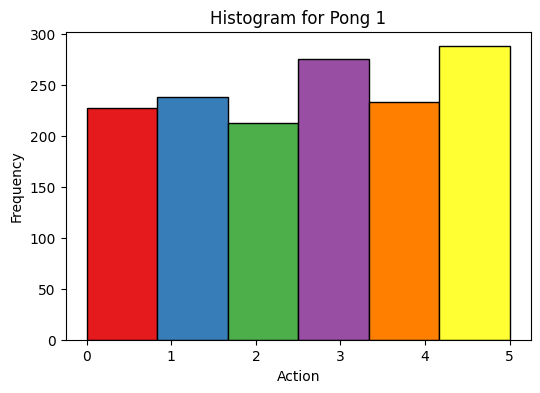

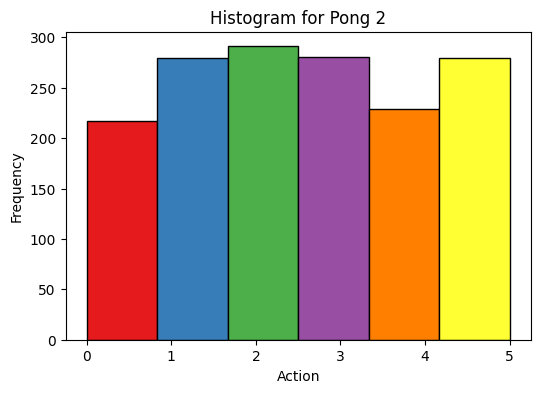

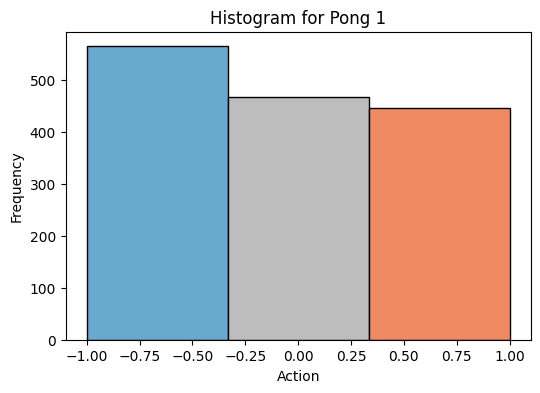

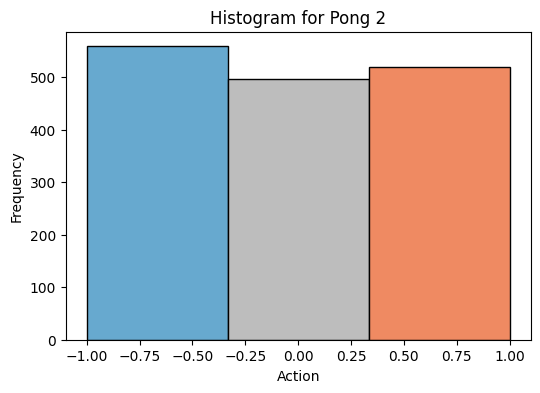

In [48]:
#| layout-ncol: 2
#| layout-nrow: 2

def hist_action_frequency(data, colors, bins, xlabel, title):
    plt.figure(figsize=(6, 4))
    counts, bins, patches = plt.hist(data, bins=bins, color='white', edgecolor='black')
    for i, patch in enumerate(patches):
        patch.set_facecolor(colors[i])
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

hist_action_frequency(data=action_pong1, colors=action_colors,
                      bins=6, xlabel='Action', title='Histogram for Pong 1')

hist_action_frequency(data=action_pong2, colors=action_colors,
                      bins=6, xlabel='Action', title='Histogram for Pong 2')

hist_action_frequency(data=new_action_pong1, colors=new_action_colors,
                      bins=3, xlabel='Action', title='Histogram for Pong 1')

hist_action_frequency(data=new_action_pong2, colors=new_action_colors,
                      bins=3, xlabel='Action', title='Histogram for Pong 2')


## Visualising frames

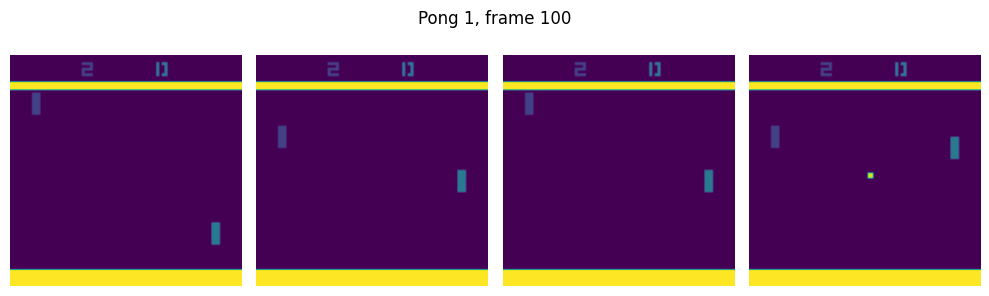

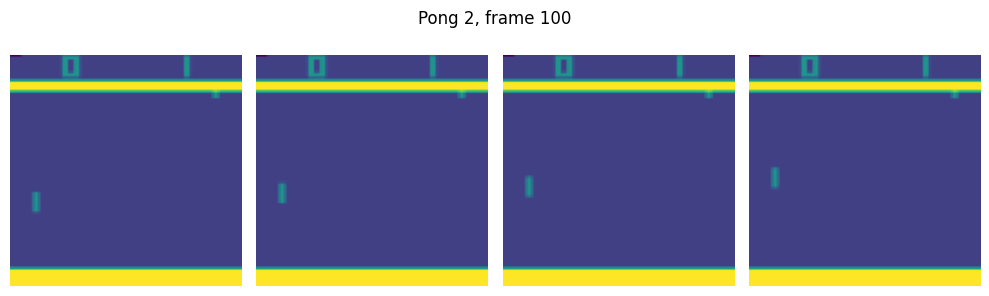

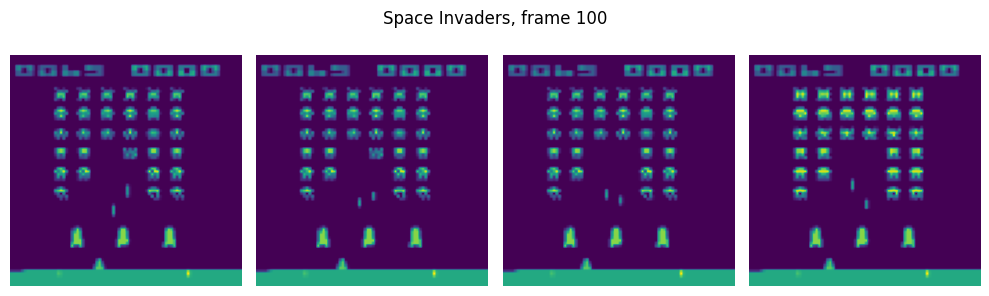

In [49]:
def plot_frames(data, frame, title):
    
    plt.figure(figsize=(10, 3))
    ii=range(0, 4)
    
    for i in ii:
        sample_image = data[frame, :, :, i]
        plt.subplot(1, 4, i + 1)
        plt.imshow(sample_image)
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

n=100
plot_frames(frames_pong1, n, f'Pong 1, frame {n}')
plot_frames(frames_pong2, n, f'Pong 2, frame {n}')
plot_frames(frames_space, n, f'Space Invaders, frame {n}')

## Dimensionality reduction
### PCA

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def perform_pca(data, n_components):
    
    starlised_data = StandardScaler().fit_transform(data)
    pca = PCA(n_components=n_components)
    pca_components = pca.fit_transform(starlised_data)
    column_names=[]
    for n in range(n_components):
        column_names.append(f'component_{n+1}')
    pca_components = pd.DataFrame(pca_components, columns=column_names)

    return pca_components, pca.explained_variance_ratio_

In [51]:
def uncoloured_3d_plot(data, title):
    fig = plt.figure(figsize=(7, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data['component_1'], data['component_2'], data['component_3'])
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.set_title(title)
    plt.show()

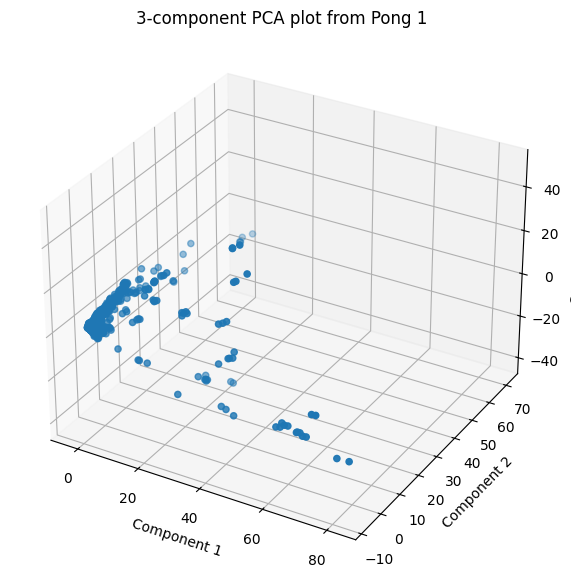

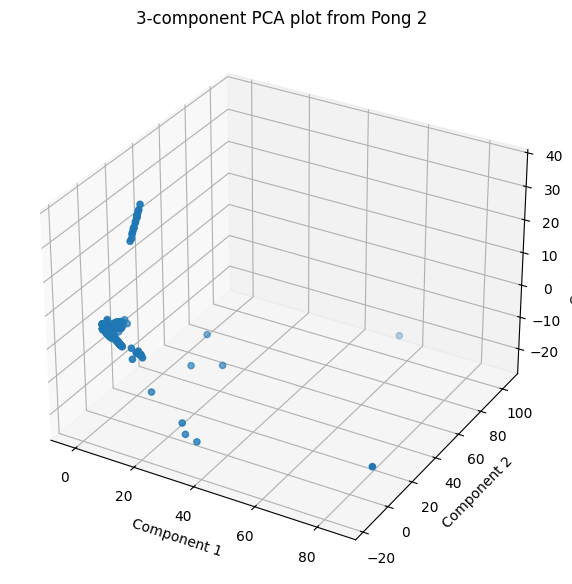

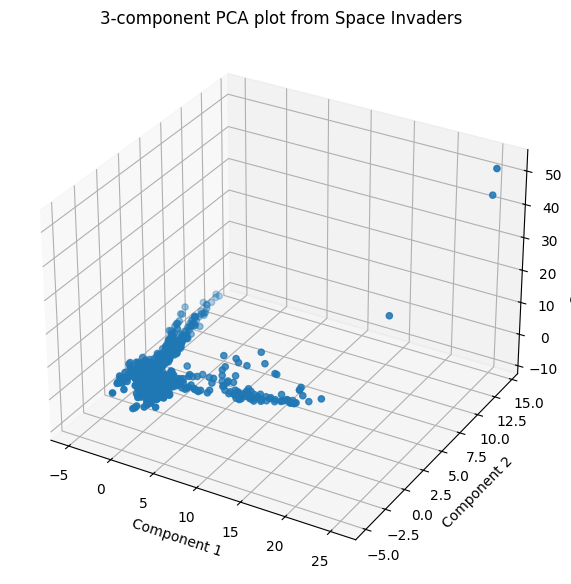

In [52]:
#| layout-ncol: 3

pca_components_pong1, pca_variance_pong1 = perform_pca(data=new_new_activity_pong1, n_components=3)
uncoloured_3d_plot(data=pca_components_pong1, title='3-component PCA plot from Pong 1')

pca_components_pong2, pca_variance_pong2 = perform_pca(data=new_new_activity_pong2, n_components=3)
uncoloured_3d_plot(data=pca_components_pong2, title='3-component PCA plot from Pong 2')

pca_components_space, pca_variance_space = perform_pca(data=new_new_activity_space, n_components=3)
uncoloured_3d_plot(data=pca_components_space, title='3-component PCA plot from Space Invaders')

In [53]:
print('Explained variance per component, Pong 1:', pca_variance_pong1)
print('Explained variance per component, Pong 2:', pca_variance_pong1)
print('Explained variance per component, Space Invaders:', pca_variance_pong1)

Explained variance per component, Pong 1: [0.15770072 0.07397692 0.05324278]
Explained variance per component, Pong 2: [0.15770072 0.07397692 0.05324278]
Explained variance per component, Space Invaders: [0.15770072 0.07397692 0.05324278]


::: {.callout-tip}
#### Follow-up idea

Write code to produce screet plot for PCA variance per component and cummulitive variance
:::

### UMAP

In [54]:
import umap

def perform_umap(data, n_components):

    umap_setup= umap.UMAP(n_components=n_components, init='random')
    umap_components = umap_setup.fit_transform(data)
    
    column_names=[]
    for n in range(n_components):
        column_names.append(f'component_{n+1}')
    umap_components = pd.DataFrame(umap_components, columns=column_names)

    return umap_components

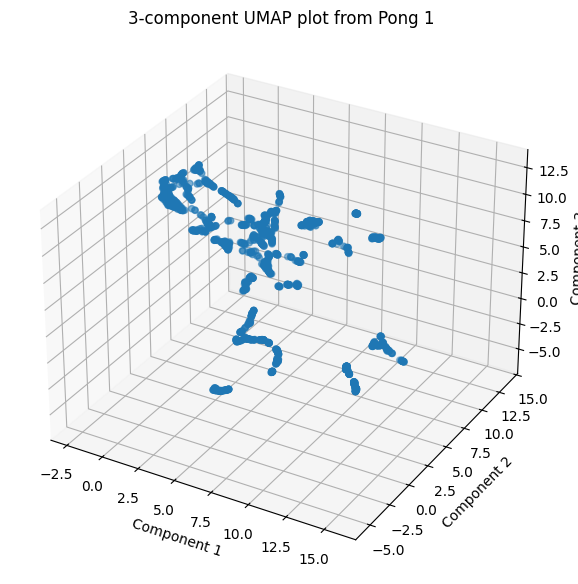

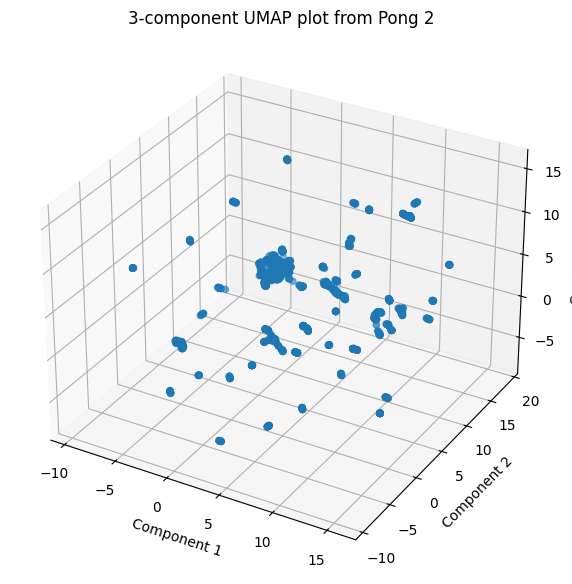

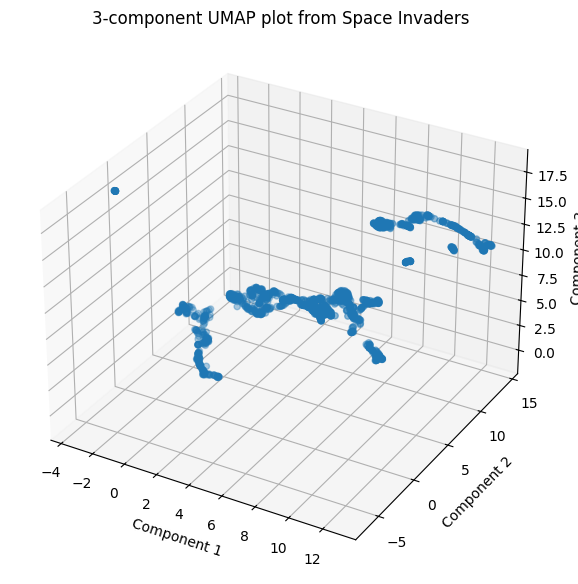

In [55]:
#| layout-ncol: 3
umap_components_pong1 = perform_umap(data=new_new_activity_pong1, n_components=3)
uncoloured_3d_plot(data=umap_components_pong1, title='3-component UMAP plot from Pong 1')
umap_components_pong2 = perform_umap(data=new_new_activity_pong2, n_components=3)
uncoloured_3d_plot(data=umap_components_pong2, title='3-component UMAP plot from Pong 2')
umap_components_space = perform_umap(data=new_new_activity_space, n_components=3)
uncoloured_3d_plot(data=umap_components_space, title='3-component UMAP plot from Space Invaders')

::: {.callout-tip}
#### Follow-up idea
The data looks quite sparse, consider accomulating data from the same model ('brain') playing the same game over multiple runs.
:::

### T-SNE

In [56]:
from sklearn.manifold import TSNE

def perform_tsne(data, n_components):

    tsne_setup = TSNE(n_components=n_components,
                  perplexity=30,
                  max_iter=1000)
    tsne_components = tsne_setup.fit_transform(data)
    
    column_names=[]
    for n in range(n_components):
        column_names.append(f'component_{n+1}')
    tsne_components = pd.DataFrame(tsne_components, columns=column_names)

    return tsne_components

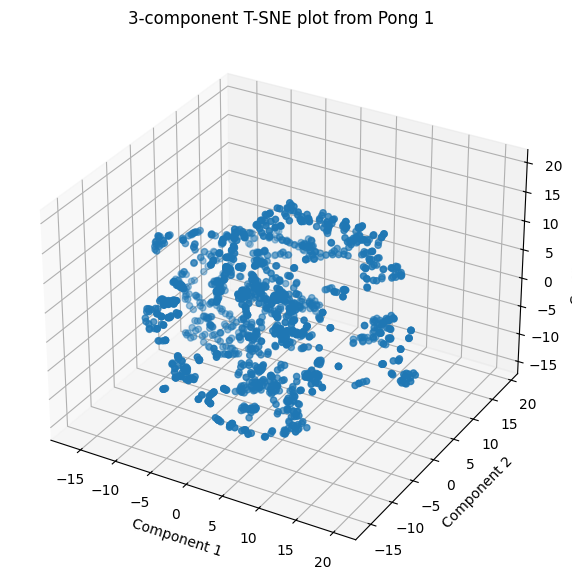

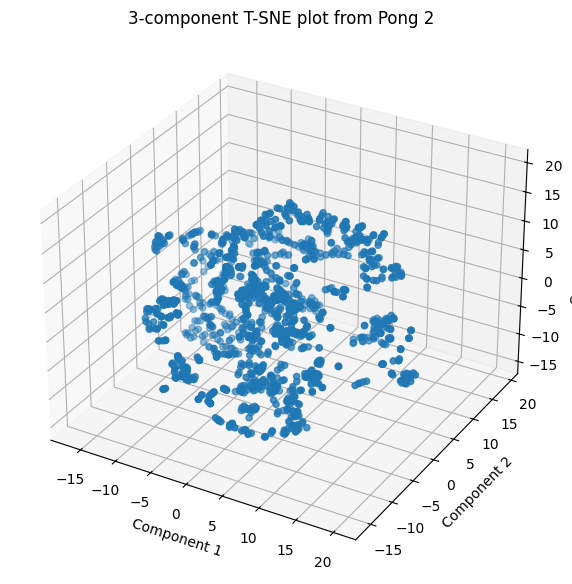

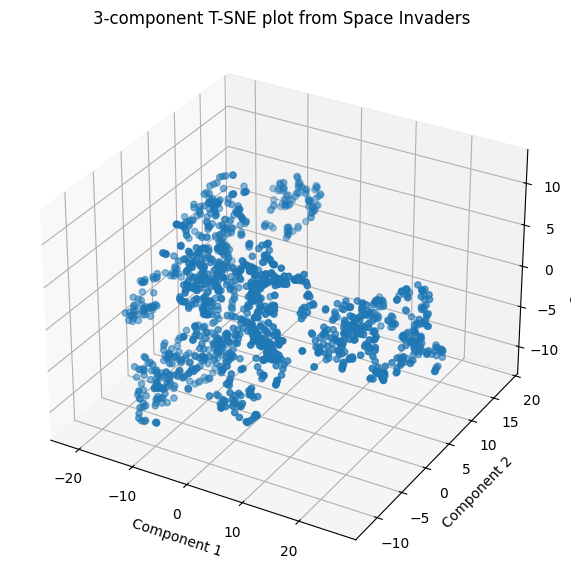

In [57]:
#| layout-ncol: 3
tsne_components_pong1 = perform_tsne(data=new_new_activity_pong1, n_components=3)
uncoloured_3d_plot(data=tsne_components_pong1, title='3-component T-SNE plot from Pong 1')
tsne_components_pong2 = perform_tsne(data=new_new_activity_pong2, n_components=3)
uncoloured_3d_plot(data=tsne_components_pong1, title='3-component T-SNE plot from Pong 2')
tsne_components_space = perform_tsne(data=new_new_activity_space, n_components=3)
uncoloured_3d_plot(data=tsne_components_space, title='3-component T-SNE plot from Space Invaders')

::: {.callout-tip}
#### Follow-up idea

Explore the effect of perplexity and number of iterations on the low-dimensional plots. Details on the effect of preplexity, can be found in [this blog post](https://distill.pub/2016/misread-tsne/) and [the original paper](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf).
:::

## Low-dimensional plots coloured by


::: {.callout-tip}
#### Follow-up idea

Try to interpret the plots below. Good luck.
If you manage, let me know, I am curious.
:::

In [58]:
def graph_3d_colour_categorical(data, title, by, labels, colors):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.set_title(title)

    x_min, x_max = data['component_1'].min(), data['component_1'].max()
    y_min, y_max = data['component_2'].min(), data['component_2'].max()
    z_min, z_max = data['component_3'].min(), data['component_3'].max()
    x_margin = (x_max - x_min) * 0.1
    ax.set_xlim(x_min - x_margin, x_max + x_margin)
    y_margin = (y_max - y_min) * 0.1
    ax.set_ylim(y_min - y_margin, y_max + y_margin)
    z_margin = (z_max - z_min) * 0.1
    ax.set_zlim(z_min - z_margin, z_max + z_margin)
    
    for label, color in zip(labels, colors):
        subset = data[(data[by] == label) ]
        ax.scatter(subset['component_1'], subset['component_2'], subset['component_3'], c = color)
        
    ax.legend(labels, loc='best')
    plt.show()

def graph_3d_colour_continuos(data, title, by, cmap):  

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.set_title(title)

    x_min, x_max = data['component_1'].min(), data['component_1'].max()
    y_min, y_max = data['component_2'].min(), data['component_2'].max()
    z_min, z_max = data['component_3'].min(), data['component_3'].max()
    x_margin = (x_max - x_min) * 0.1
    ax.set_xlim(x_min - x_margin, x_max + x_margin)
    y_margin = (y_max - y_min) * 0.1
    ax.set_ylim(y_min - y_margin, y_max + y_margin)
    z_margin = (z_max - z_min) * 0.1
    ax.set_zlim(z_min - z_margin, z_max + z_margin)
    
    cmap = plt.get_cmap(cmap) 
    
    if by=='Index':
        indices = [index for index, value in enumerate(data['component_1'])] 
        sc = ax.scatter(data['component_1'], data['component_2'],
                   data['component_3'], c=indices, cmap=cmap)

    else:
        sc = ax.scatter(data['component_1'], data['component_2'],
                   data['component_3'], c=data[by], cmap=cmap)
    
    cbar = plt.colorbar(sc)
    cbar.set_label(by)

    plt.show()

::: {.callout-tip}
#### Follow-up idea

You can also use Plotly package to make interactive plots, which is especially handy for quiet dense plots to see hidden structures.
:::

### action

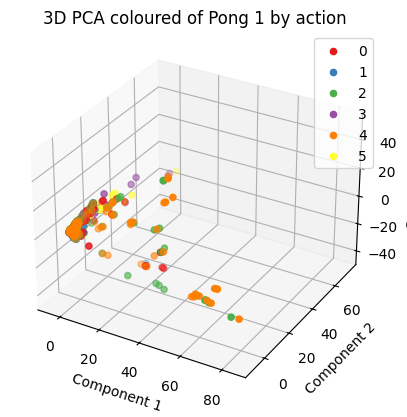

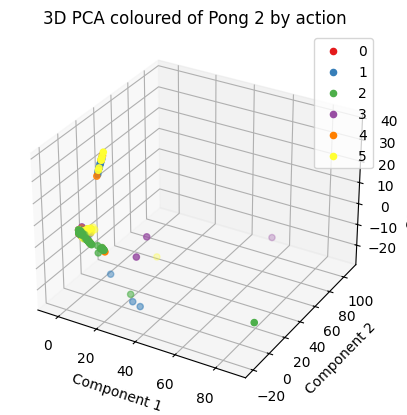

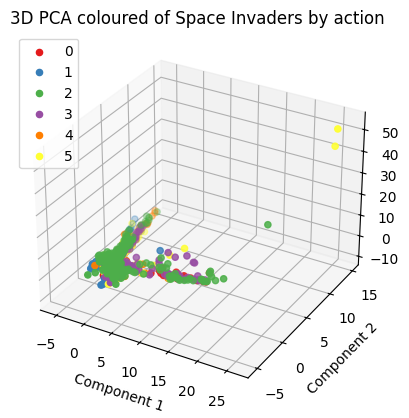

In [59]:
#| layout-ncol: 3

by='action'

pca_components_pong1[by]=action_pong1
graph_3d_colour_categorical(data=pca_components_pong1, by=by,
             title=f'3D PCA coloured of Pong 1 by {by}', 
             labels = action_labels,
             colors = action_colors)
pca_components_pong2[by]=action_pong2
graph_3d_colour_categorical(data=pca_components_pong2, by=by,
             title=f'3D PCA coloured of Pong 2 by {by}', 
             labels = action_labels,
             colors = action_colors)
pca_components_space[by]=action_space
graph_3d_colour_categorical(data=pca_components_space, by=by,
             title=f'3D PCA coloured of Space Invaders by {by}', 
             labels = action_labels,
             colors = action_colors)


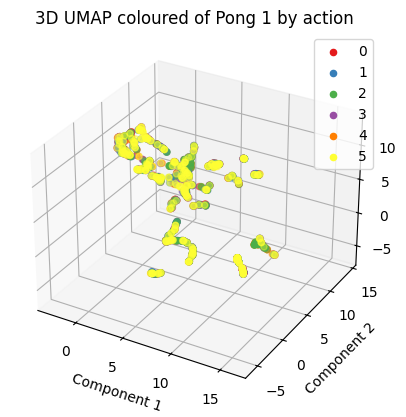

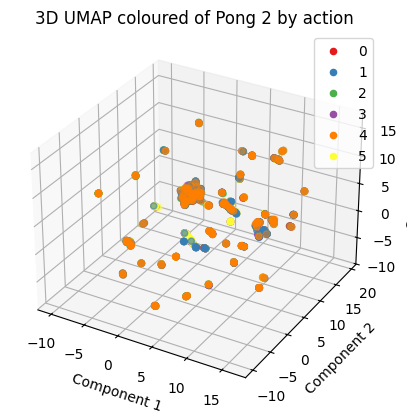

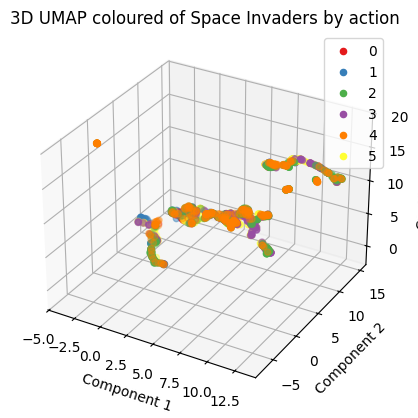

In [60]:
#| layout-ncol: 3

by='action'

umap_components_pong1[by]=action_pong1
graph_3d_colour_categorical(data=umap_components_pong1, by=by,
             title=f'3D UMAP coloured of Pong 1 by {by}', 
             labels = action_labels,
             colors = action_colors)
umap_components_pong2[by]=action_pong2
graph_3d_colour_categorical(data=umap_components_pong2, by=by,
             title=f'3D UMAP coloured of Pong 2 by {by}', 
             labels = action_labels,
             colors = action_colors)
umap_components_space[by]=action_space
graph_3d_colour_categorical(data=umap_components_space, by=by,
             title=f'3D UMAP coloured of Space Invaders by {by}', 
             labels = action_labels,
             colors = action_colors)

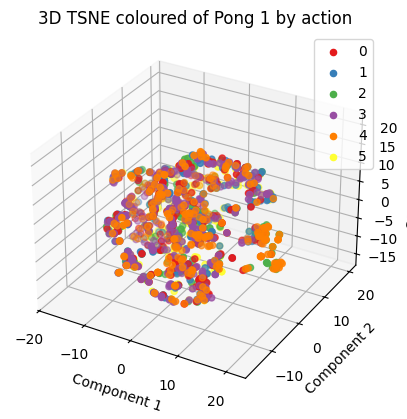

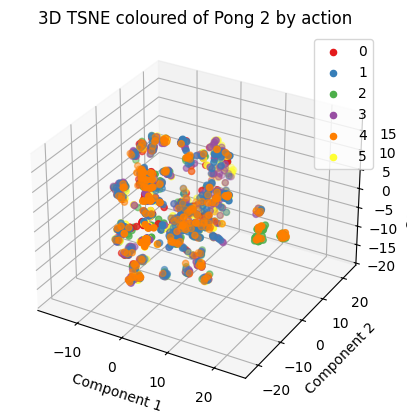

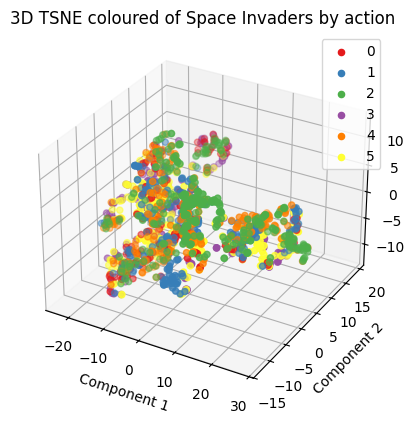

In [61]:
#| layout-ncol: 3

by='action'

tsne_components_pong1[by]=action_pong1
graph_3d_colour_categorical(data=tsne_components_pong1, by=by,
             title=f'3D TSNE coloured of Pong 1 by {by}', 
             labels = action_labels,
             colors = action_colors)
tsne_components_pong2[by]=action_pong2
graph_3d_colour_categorical(data=tsne_components_pong2, by=by,
             title=f'3D TSNE coloured of Pong 2 by {by}', 
             labels = action_labels,
             colors = action_colors)
tsne_components_space[by]=action_space
graph_3d_colour_categorical(data=tsne_components_space, by=by,
             title=f'3D TSNE coloured of Space Invaders by {by}', 
             labels = action_labels,
             colors = action_colors)

### new action

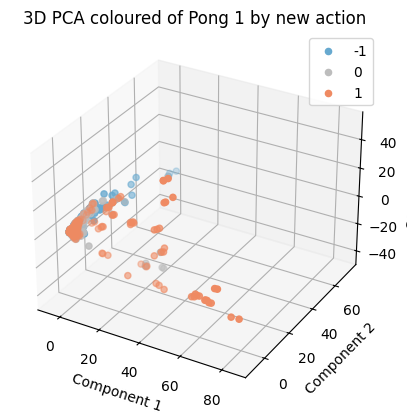

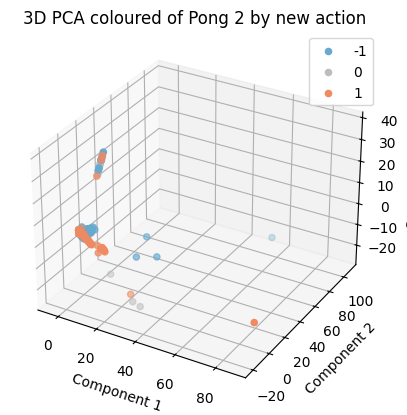

In [62]:
#| layout-ncol: 2
by='new action'
pca_components_pong1[by]=new_action_pong1
graph_3d_colour_categorical(data=pca_components_pong1, by=by,
             title=f'3D PCA coloured of Pong 1 by {by}', 
             labels = new_action_labels,
             colors = new_action_colors)
pca_components_pong2[by]=new_action_pong2
graph_3d_colour_categorical(data=pca_components_pong2, by=by,
             title=f'3D PCA coloured of Pong 2 by {by}', 
             labels = new_action_labels,
             colors = new_action_colors)

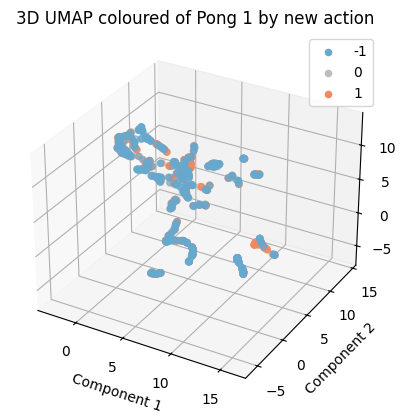

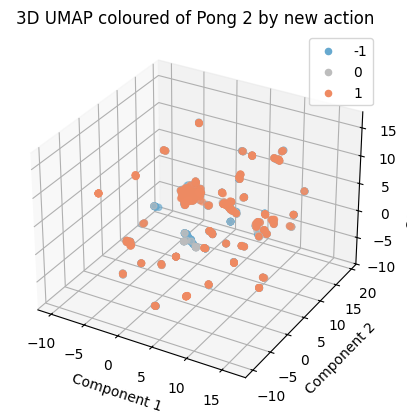

In [63]:
#| layout-ncol: 2
by='new action'
umap_components_pong1[by]=new_action_pong1
graph_3d_colour_categorical(data=umap_components_pong1, by=by,
             title=f'3D UMAP coloured of Pong 1 by {by}', 
             labels = new_action_labels,
             colors = new_action_colors)
umap_components_pong2[by]=new_action_pong2
graph_3d_colour_categorical(data=umap_components_pong2, by=by,
             title=f'3D UMAP coloured of Pong 2 by {by}', 
             labels = new_action_labels,
             colors = new_action_colors)

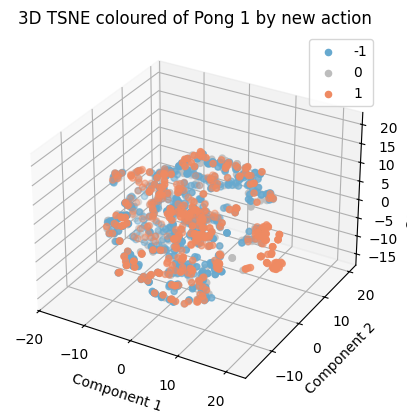

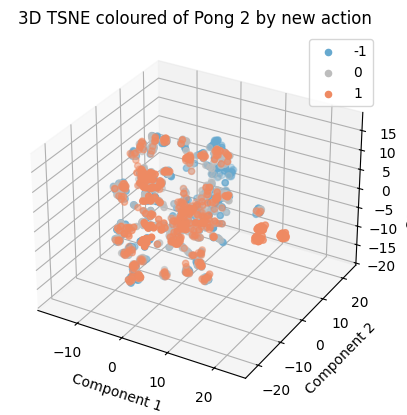

In [64]:
#| layout-ncol: 2
by='new action'
tsne_components_pong1[by]=new_action_pong1
graph_3d_colour_categorical(data=tsne_components_pong1, by=by,
             title=f'3D TSNE coloured of Pong 1 by {by}', 
             labels = new_action_labels,
             colors = new_action_colors)
tsne_components_pong2[by]=new_action_pong2
graph_3d_colour_categorical(data=tsne_components_pong2, by=by,
             title=f'3D TSNE coloured of Pong 2 by {by}', 
             labels = new_action_labels,
             colors = new_action_colors)

### timebins

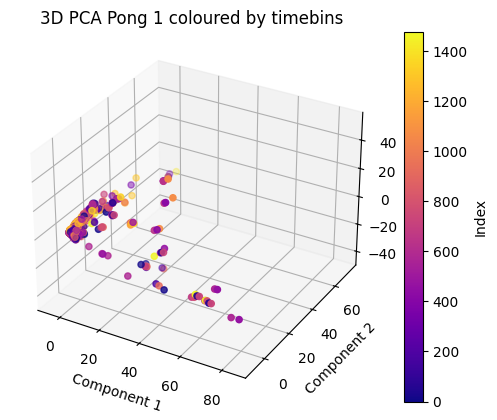

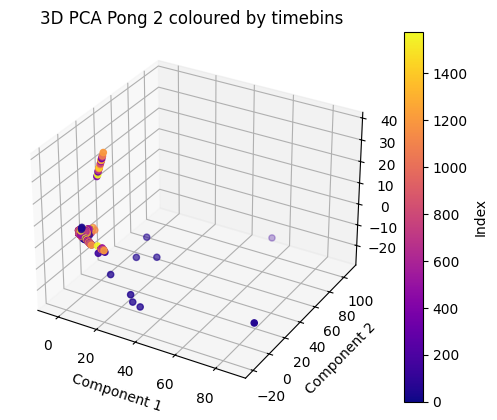

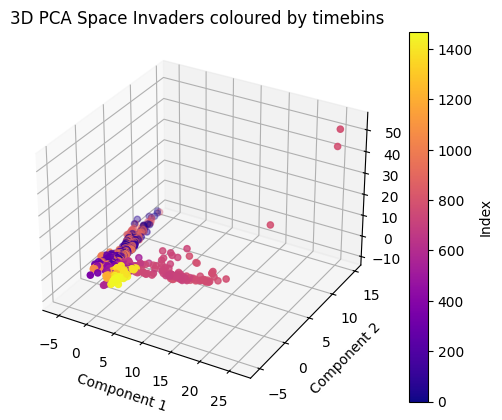

In [65]:
#| layout-ncol: 3
graph_3d_colour_continuos(data=pca_components_pong1,
                          title='3D PCA Pong 1 coloured by timebins ',
                          by='Index', cmap='plasma')
graph_3d_colour_continuos(data=pca_components_pong2,
                          title='3D PCA Pong 2 coloured by timebins ',
                          by='Index', cmap='plasma')
graph_3d_colour_continuos(data=pca_components_space,
                          title='3D PCA Space Invaders coloured by timebins ',
                          by='Index', cmap='plasma')

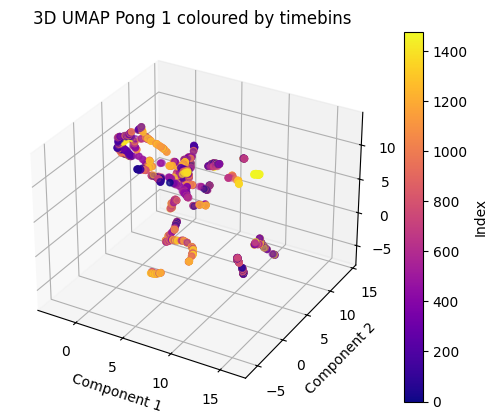

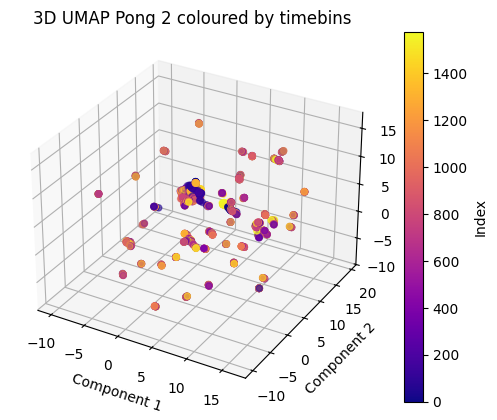

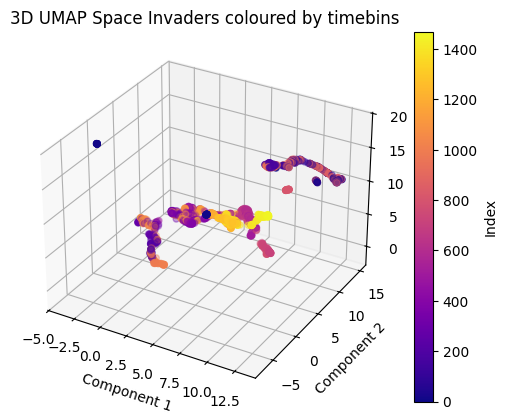

In [66]:
#| layout-ncol: 3
graph_3d_colour_continuos(data=umap_components_pong1,
                          title='3D UMAP Pong 1 coloured by timebins ',
                          by='Index', cmap='plasma')
graph_3d_colour_continuos(data=umap_components_pong2,
                          title='3D UMAP Pong 2 coloured by timebins ',
                          by='Index', cmap='plasma')
graph_3d_colour_continuos(data=umap_components_space,
                          title='3D UMAP Space Invaders coloured by timebins', 
                          by='Index', cmap='plasma')

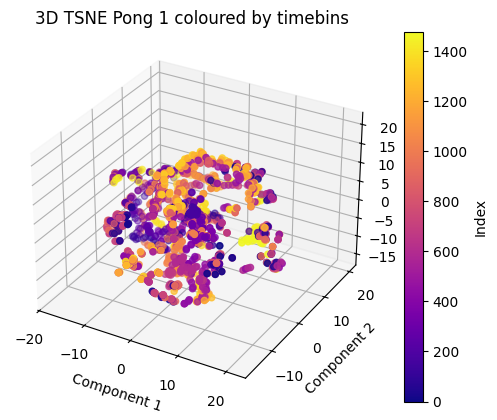

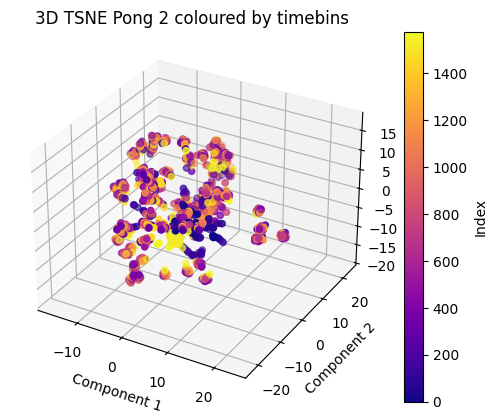

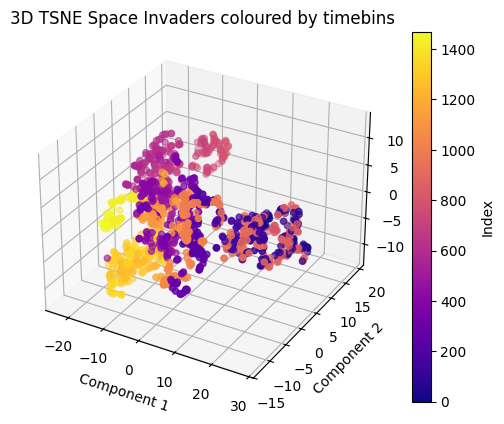

In [67]:
#| layout-ncol: 3
graph_3d_colour_continuos(data=tsne_components_pong1,
                          title='3D TSNE Pong 1 coloured by timebins ',
                          by='Index', cmap='plasma')
graph_3d_colour_continuos(data=tsne_components_pong2,
                          title='3D TSNE Pong 2 coloured by timebins ',
                          by='Index', cmap='plasma')
graph_3d_colour_continuos(data=tsne_components_space,
                          title='3D TSNE Space Invaders coloured by timebins', 
                          by='Index', cmap='plasma')

### RAM

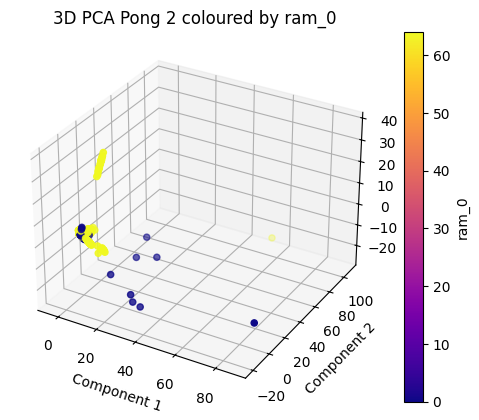

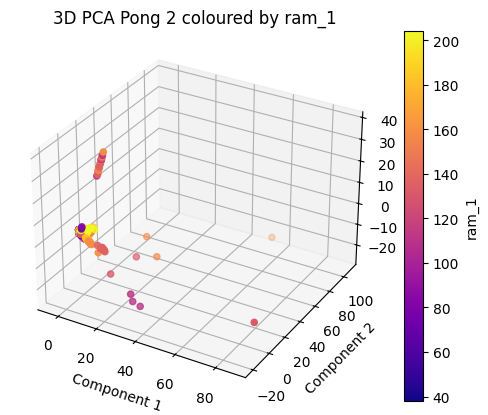

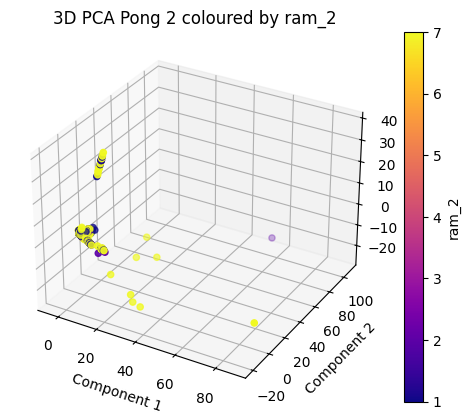

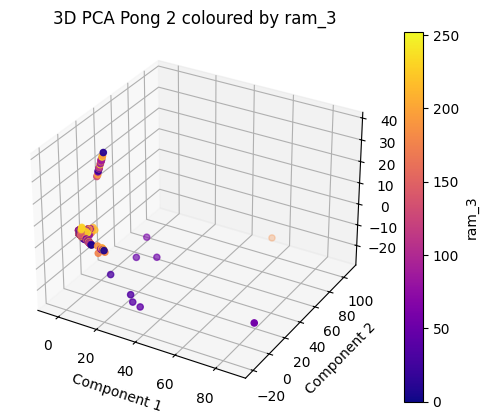

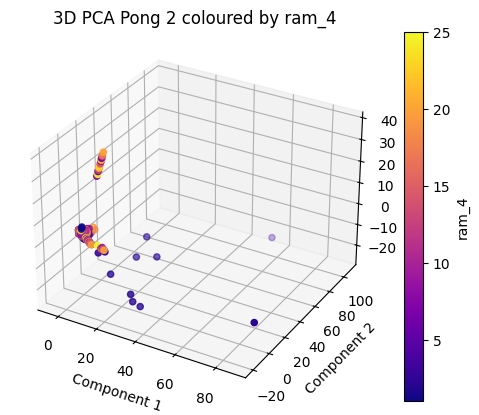

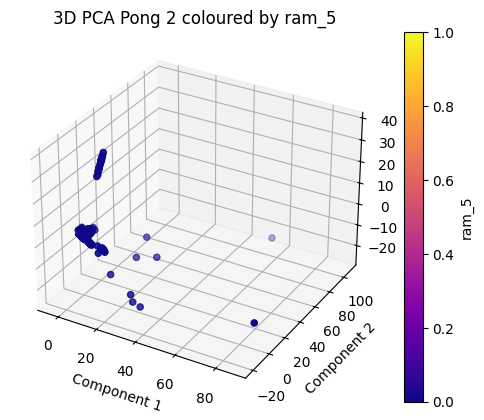

In [68]:
#| layout-ncol: 3
#| layout-nrow: 2


for i in range(6):    
    by=f'ram_{i}'
    pca_components_pong2[by]=new_new_ram_pong2.iloc[:, i]
    graph_3d_colour_continuos(data=pca_components_pong2,
                              title=f'3D PCA Pong 2 coloured by {by}',
                              by=by, cmap='plasma')


### activation of single neuron

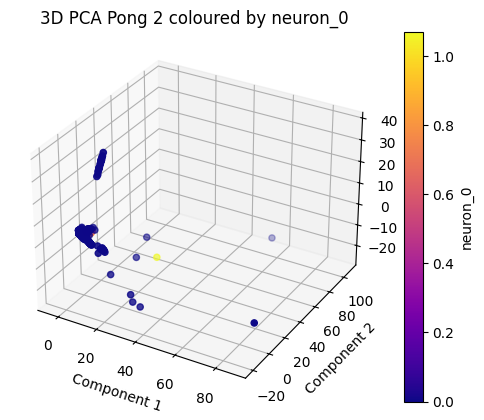

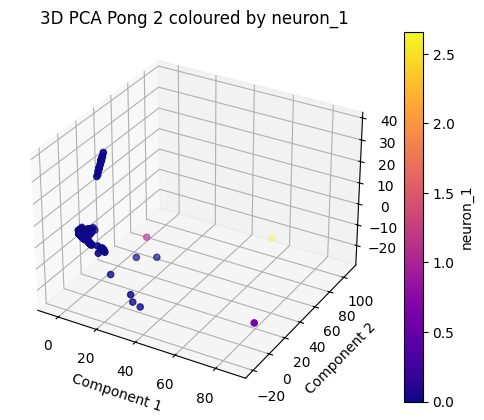

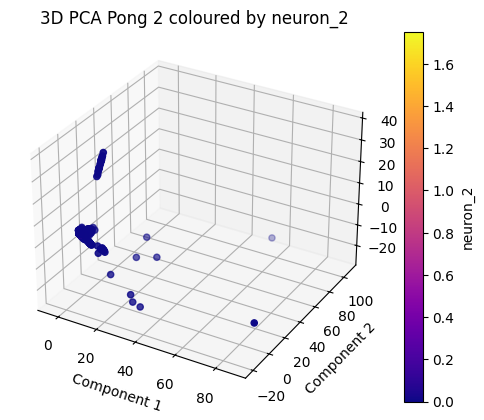

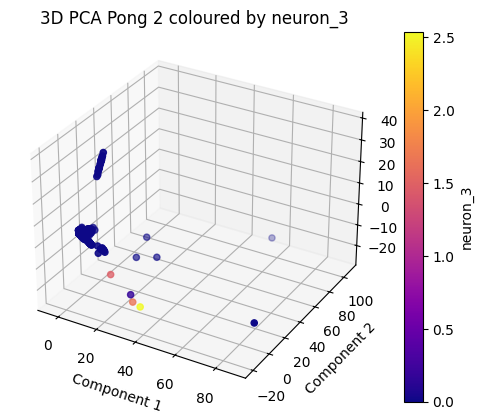

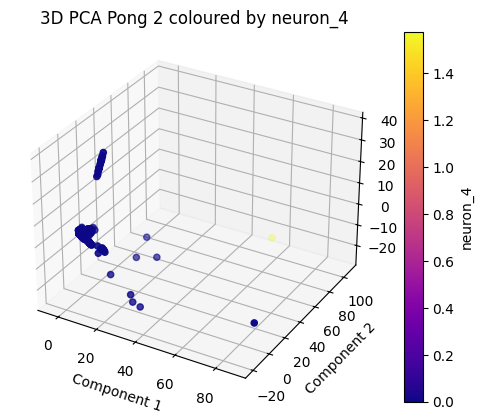

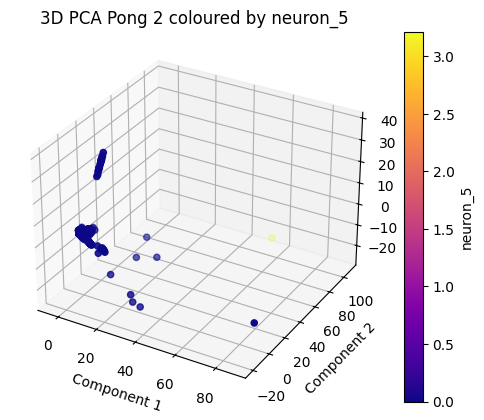

In [69]:
#| layout-ncol: 3
#| layout-nrow: 2


for i in range(6):    
    by=f'neuron_{i}'
    pca_components_pong2[by]=new_new_activity_pong2.iloc[:, i]
    graph_3d_colour_continuos(data=pca_components_pong2,
                              title=f'3D PCA Pong 2 coloured by {by}',
                              by=by, cmap='plasma')

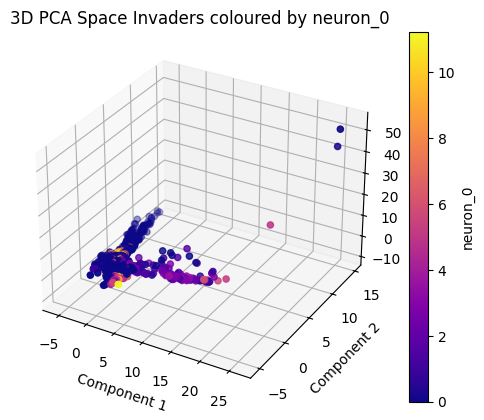

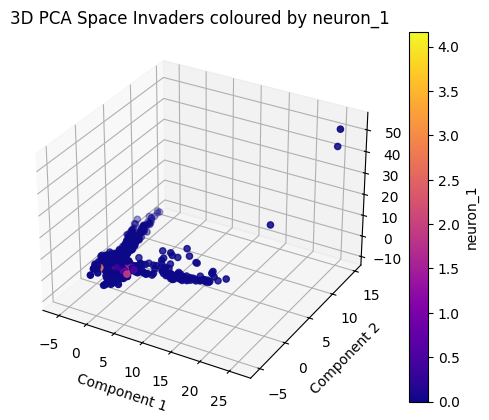

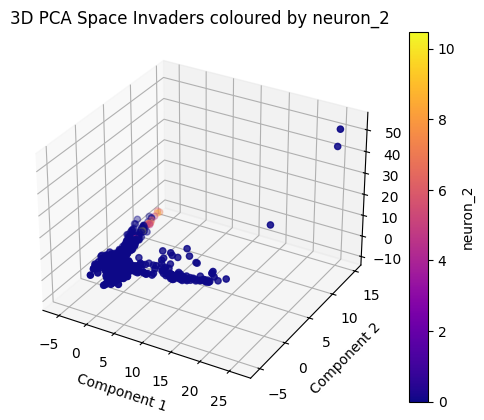

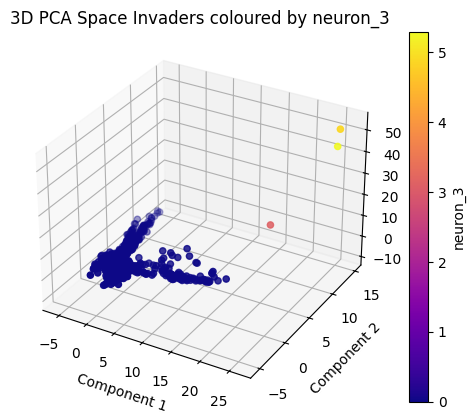

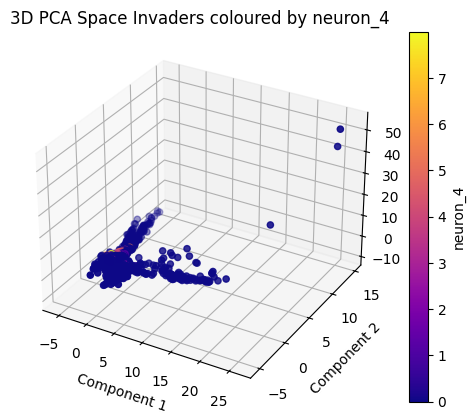

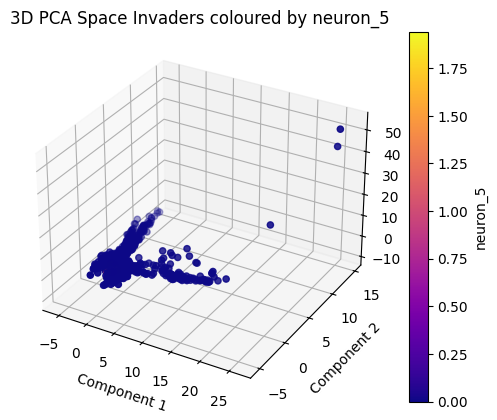

In [70]:
#| layout-ncol: 3
#| layout-nrow: 2


for i in range(6):    
    by=f'neuron_{i}'
    pca_components_space[by]=new_new_activity_space.iloc[:, i]
    graph_3d_colour_continuos(data=pca_components_space,
                              title=f'3D PCA Space Invaders coloured by {by}',
                              by=by, cmap='plasma')

### ball position in Pong 2

In pong RAM file, values at index 49 represent ball x position and at 54 - ball y position.

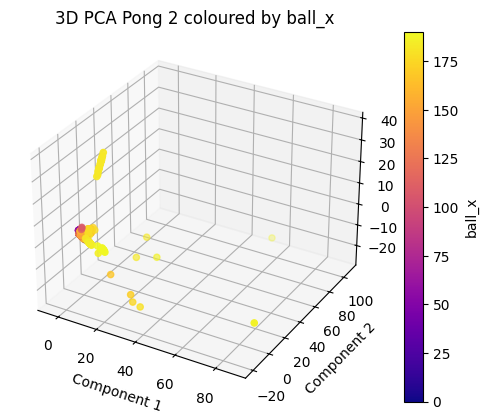

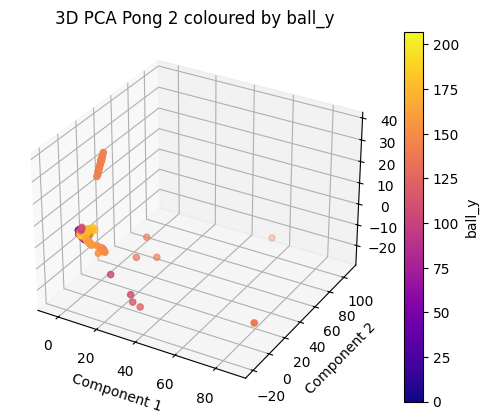

In [71]:
#| layout-ncol: 2

by='ball_x'
pca_components_pong2[by]=ram_pong2[:, 49]
graph_3d_colour_continuos(data=pca_components_pong2,
                          title=f'3D PCA Pong 2 coloured by {by}',
                          by=by, cmap='plasma')

by='ball_y'
pca_components_pong2[by]=ram_pong2[:, 54]
graph_3d_colour_continuos(data=pca_components_pong2,
                          title=f'3D PCA Pong 2 coloured by {by}',
                          by=by, cmap='plasma')

## Hierarchical clustering

[Video introduction to hierarchical clustering](https://youtu.be/7xHsRkOdVwo?si=CwdJo6_qWMjsjWE2)

### Creating clusters and dendogram

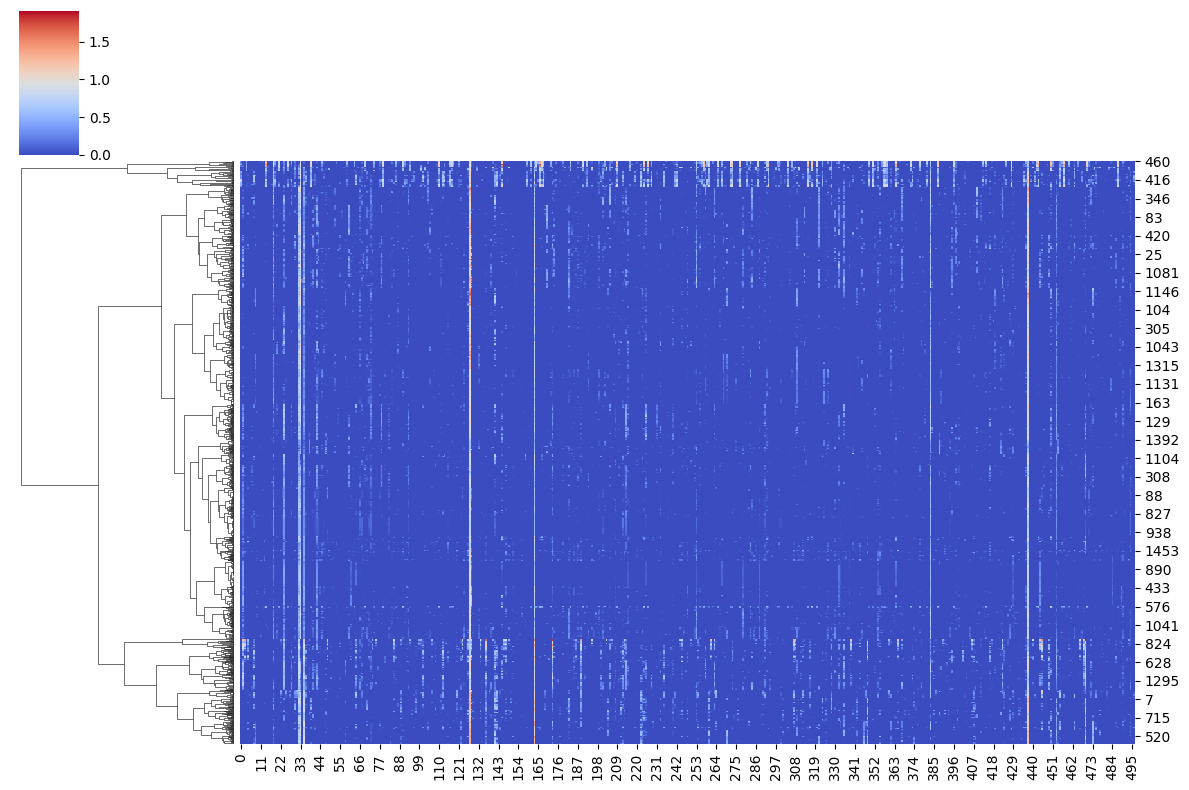

In [72]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
import fastcluster

distance_matrix = pdist(new_new_activity_pong1, metric='euclidean')

linkage_matrix = fastcluster.linkage(distance_matrix, method='ward')

sns.clustermap(new_new_activity_pong1, row_linkage=linkage_matrix,
               col_cluster=False, cmap='coolwarm',
               figsize=(12, 8), annot=False)

plt.show()

::: {.callout-tip}
#### Follow-up idea

Explore other methods to estimate similarity of neuronal signals, for example cosine similarity.
:::

Below, I plotted frames from top 3 clusters and visually inspected the frames:

### Extract indexes from top 3 clusters

In [73]:
num_clusters = 3
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

clusters = {}
for cluster_num in np.unique(cluster_labels):
    clusters[cluster_num] = np.where(cluster_labels == cluster_num)[0]

ind=[]
for cluster_num, indices in clusters.items():
    ind.append(indices)

Below are the number of neurons in each of the clusters:

In [74]:
len(ind[0]), len(ind[1]), len(ind[2])

(65, 1145, 266)

### Visualise frames from each cluster

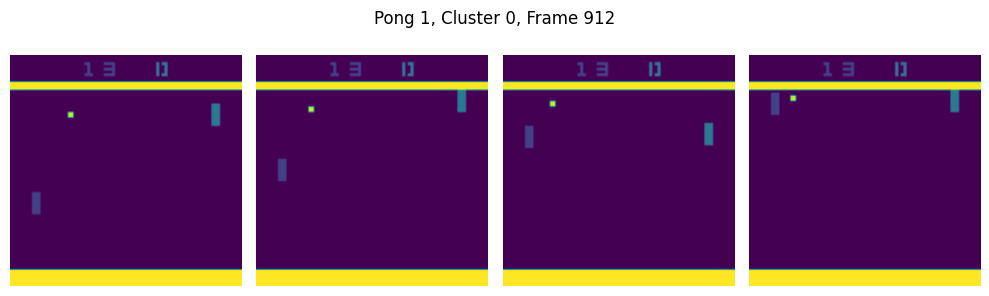

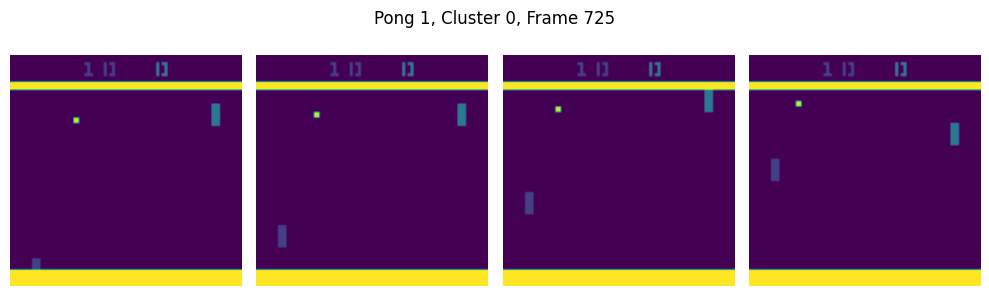

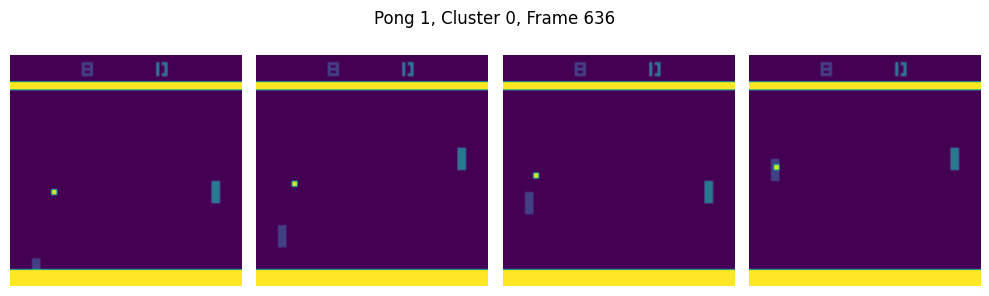

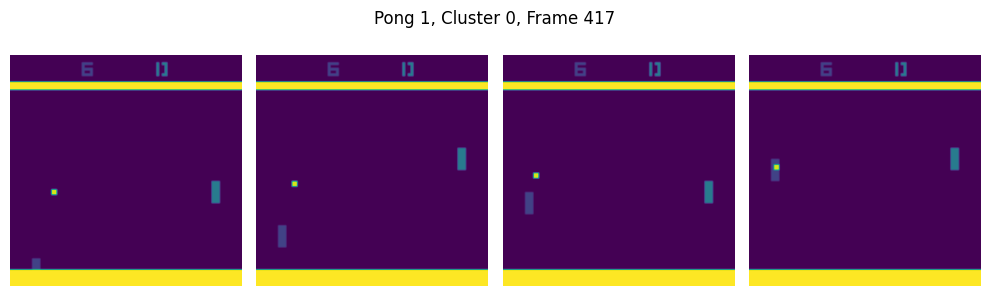

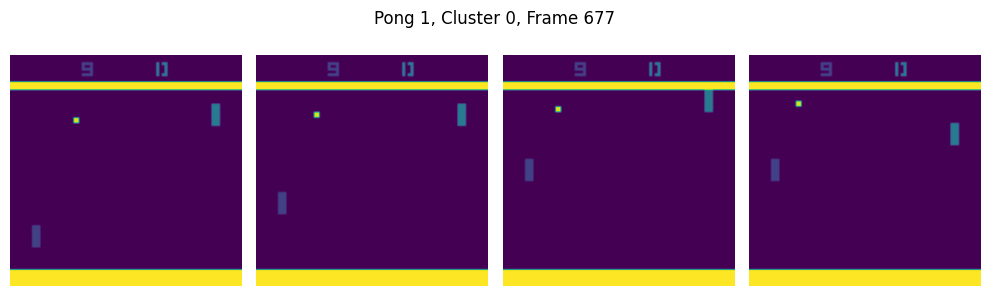

In [75]:
for n in np.random.choice(ind[0], size=5, replace=False):
    plot_frames(frames_pong1, n, title=f'Pong 1, Cluster 0, Frame {n}')

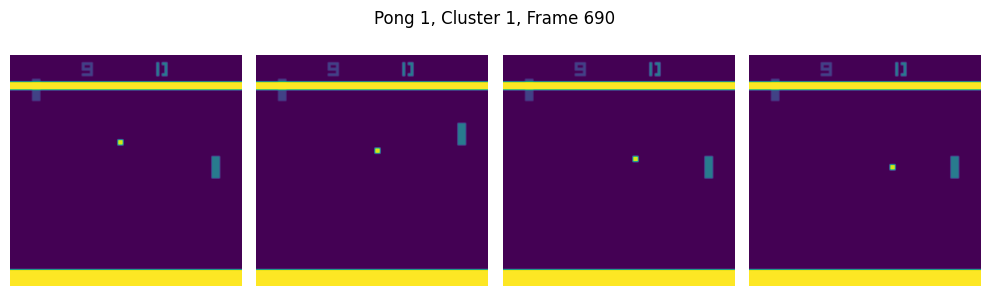

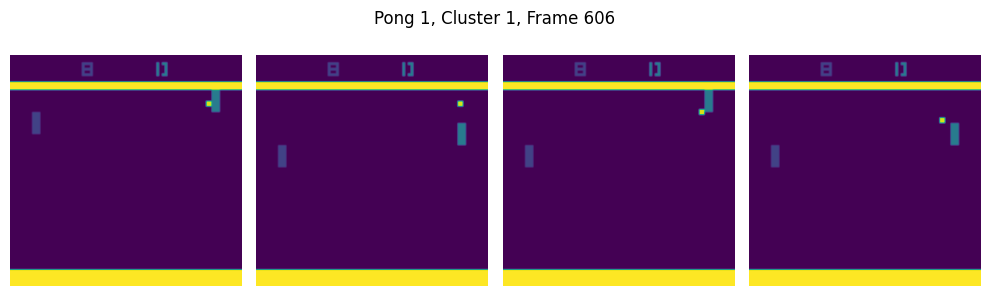

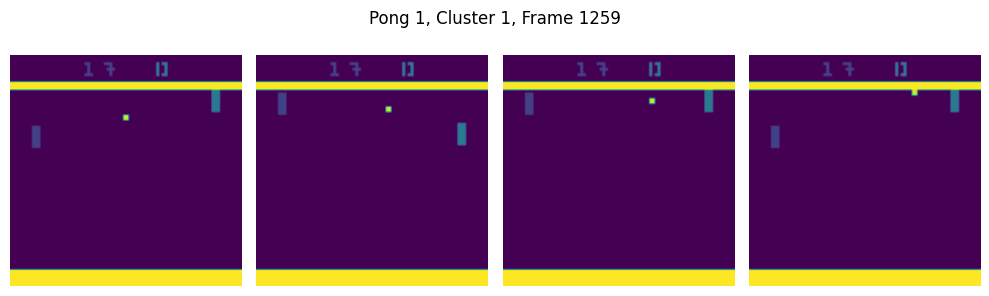

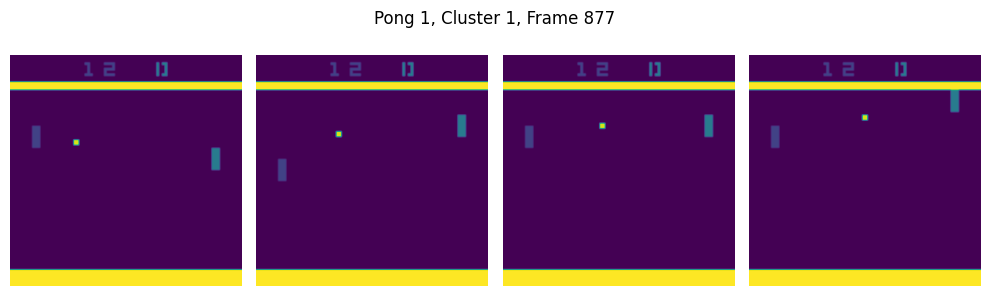

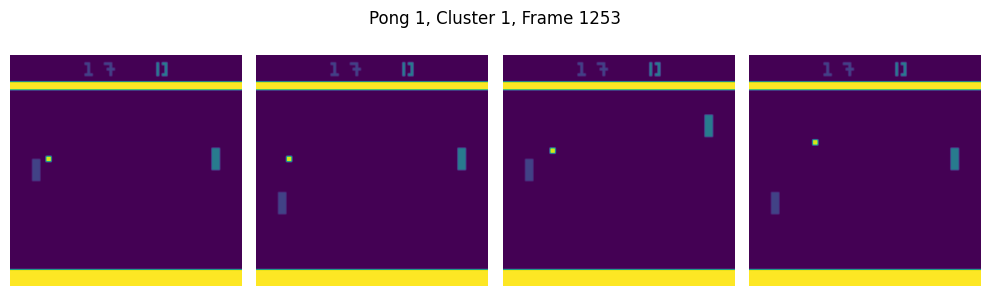

In [76]:
for n in np.random.choice(ind[1], size=5, replace=False):
    plot_frames(frames_pong1, n, title=f'Pong 1, Cluster 1, Frame {n}')

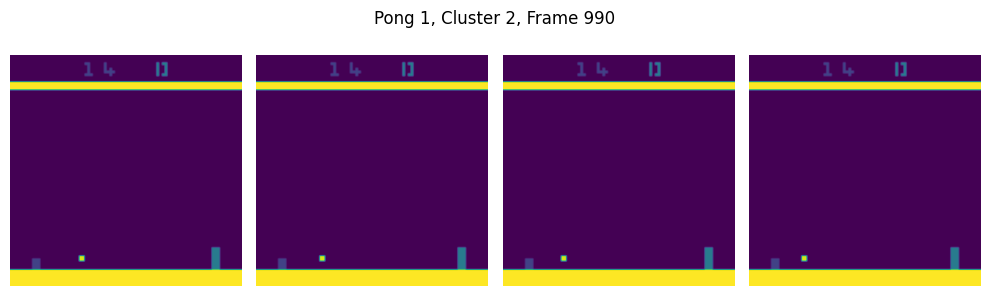

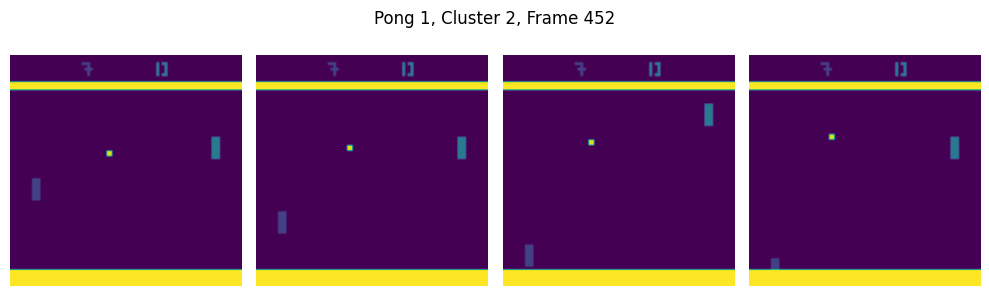

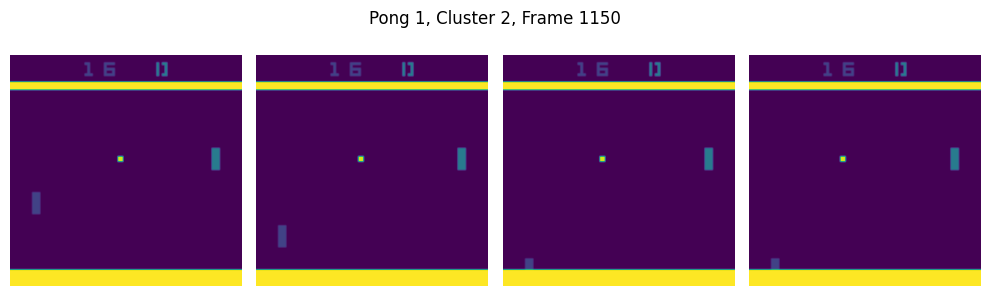

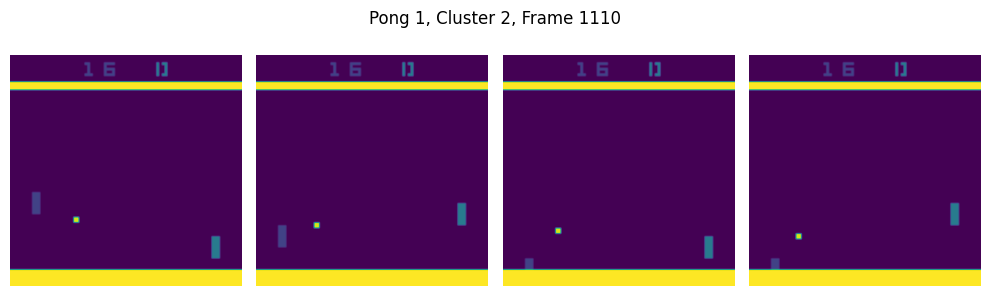

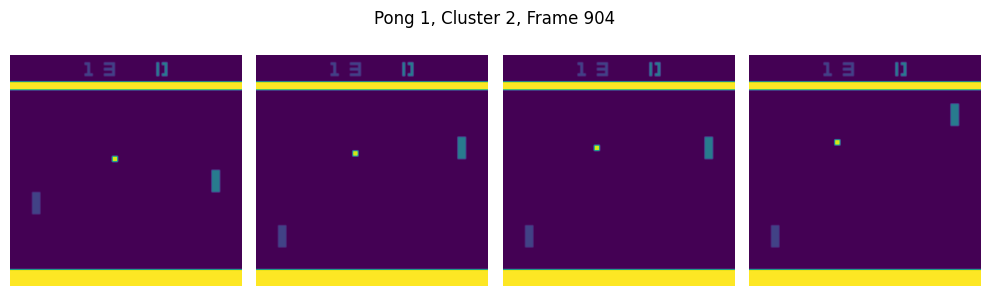

In [77]:
for n in np.random.choice(ind[2], size=5, replace=False):
    plot_frames(frames_pong1, n, title=f'Pong 1, Cluster 2, Frame {n}')

It seems that there is some difference in the ball position across clusters.

### Visualise ball position for each cluster

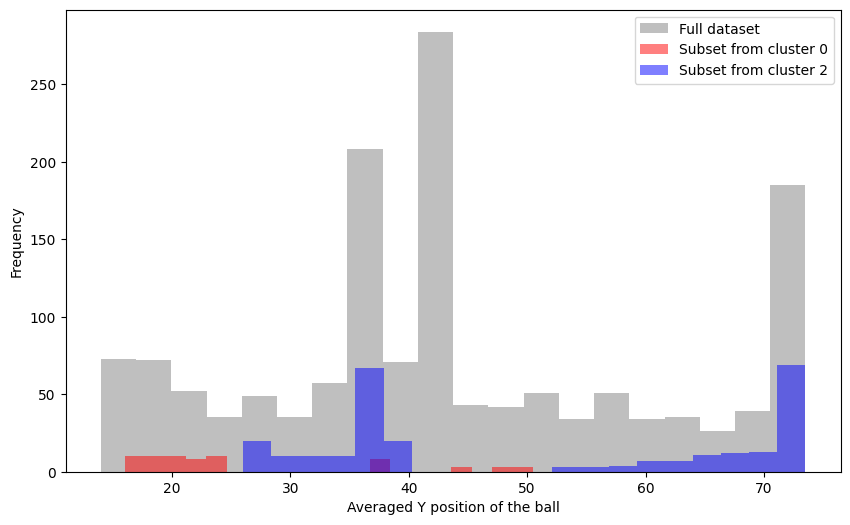

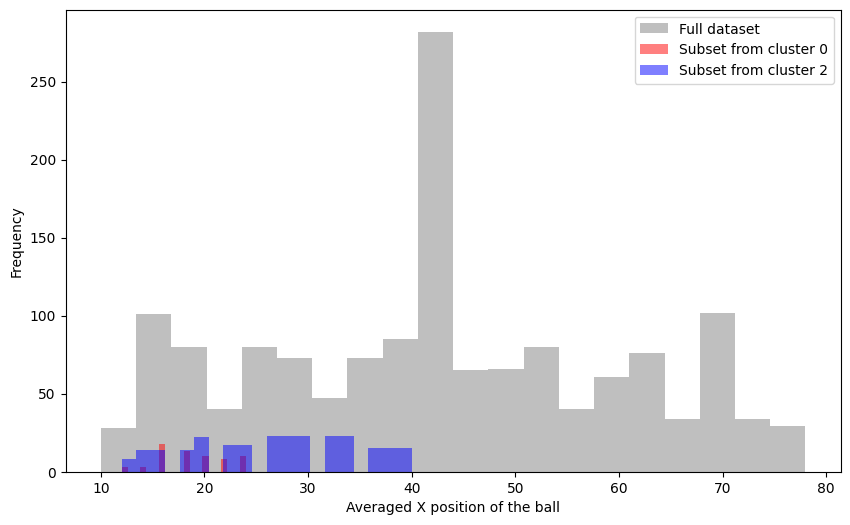

In [78]:
#| layout-ncol: 2

full_dataset=[]
cluster0=[]
cluster2=[]
position='y'
for n in ind[0]:
    average=np.mean([info_pong1[n]['Ball1'][position], info_pong1[n-1]['Ball1'][position], info_pong1[n-2]['Ball1'][position], info_pong1[n-3]['Ball1'][position]])
    cluster0.append(average)

for n in ind[2]:
    average=np.mean([info_pong1[n]['Ball1'][position], info_pong1[n-1]['Ball1'][position], info_pong1[n-2]['Ball1'][position], info_pong1[n-3]['Ball1'][position]])
    cluster2.append(average)

for n in range(len(info_pong1)):
    average=np.mean([info_pong1[n]['Ball1'][position], info_pong1[n-1]['Ball1'][position], info_pong1[n-2]['Ball1'][position], info_pong1[n-3]['Ball1'][position]])
    full_dataset.append(average)


plt.figure(figsize=(10, 6))
plt.hist(full_dataset, bins=20, alpha=0.5, label='Full dataset', color='grey')
plt.hist(cluster0, bins=20, alpha=0.5, label='Subset from cluster 0', color='red')
plt.hist(cluster2, bins=20, alpha=0.5, label='Subset from cluster 2', color='blue')
plt.xlabel('Averaged Y position of the ball')
plt.ylabel('Frequency')
plt.legend()
plt.show()



full_dataset=[]
cluster0=[]
cluster2=[]
position='x'
for n in ind[0]:
    average=np.mean([info_pong1[n]['Ball1'][position], info_pong1[n-1]['Ball1'][position], info_pong1[n-2]['Ball1'][position], info_pong1[n-3]['Ball1'][position]])
    cluster0.append(average)

for n in ind[2]:
    average=np.mean([info_pong1[n]['Ball1'][position], info_pong1[n-1]['Ball1'][position], info_pong1[n-2]['Ball1'][position], info_pong1[n-3]['Ball1'][position]])
    cluster2.append(average)

for n in range(len(info_pong1)):
    average=np.mean([info_pong1[n]['Ball1'][position], info_pong1[n-1]['Ball1'][position], info_pong1[n-2]['Ball1'][position], info_pong1[n-3]['Ball1'][position]])
    full_dataset.append(average)


plt.figure(figsize=(10, 6))
plt.hist(full_dataset, bins=20, alpha=0.5, label='Full dataset', color='grey')
plt.hist(cluster0, bins=20, alpha=0.5, label='Subset from cluster 0', color='red')
plt.hist(cluster2, bins=20, alpha=0.5, label='Subset from cluster 2', color='blue')
plt.xlabel('Averaged X position of the ball')
plt.ylabel('Frequency')
plt.legend()
plt.show()

So it seems that both cluster 0 and 2 code for when the ball is close to the agent side and cluster 0 codes for high ball Y position.

::: {.callout-tip}
#### Follow-up idea

Ball position is just a first idea, but maybe it is not the ball position, but distance between agent and ball, or direction of ball movement, or some other feature. This can be easily  with the code provided above.
:::

### Colour low-dimensional plots by cluster

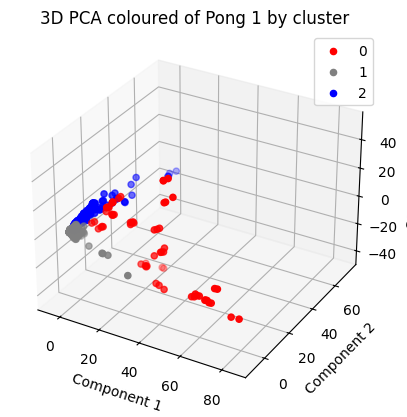

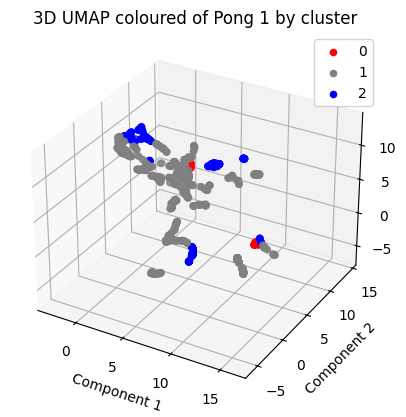

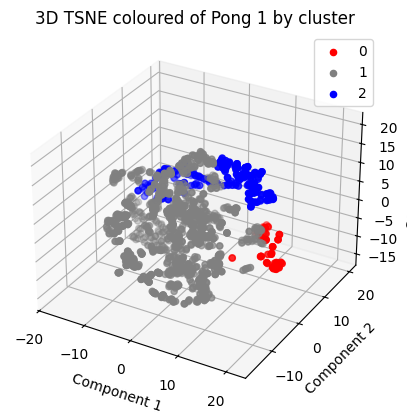

In [79]:
#| layout-ncol: 3

def add_cluster_label(data):
    data['cluster']=1
    for n in range(len(data)):
        if n in ind[0]:
            data.loc[n, 'cluster'] = 0
        if n in ind[2]:
            data.loc[n, 'cluster'] = 2

add_cluster_label(data=pca_components_pong1)

graph_3d_colour_categorical(data=pca_components_pong1, by='cluster',
             title=f'3D PCA coloured of Pong 1 by cluster', 
             labels = [0, 1, 2], colors = ['red', 'grey', 'blue'])

add_cluster_label(data=umap_components_pong1)

graph_3d_colour_categorical(data=umap_components_pong1, by='cluster',
             title=f'3D UMAP coloured of Pong 1 by cluster', 
             labels = [0, 1, 2], colors = ['red', 'grey', 'blue'])

add_cluster_label(data=tsne_components_pong1)

graph_3d_colour_categorical(data=tsne_components_pong1, by='cluster',
             title=f'3D TSNE coloured of Pong 1 by cluster', 
             labels = [0, 1, 2], colors = ['red', 'grey', 'blue'])

## Correlation matrix

::: {.callout-tip}
#### Follow-up idea

Explore other methods to look at similarity of signals, for example: Pearson's correlation, Spearman correlation, Cross correlation analysis. In short, any method that somehow can analyse the similarity of the two signal (feature and neuron) should work. Even looking at visual similarity of signals (as done above) can be a method.
:::

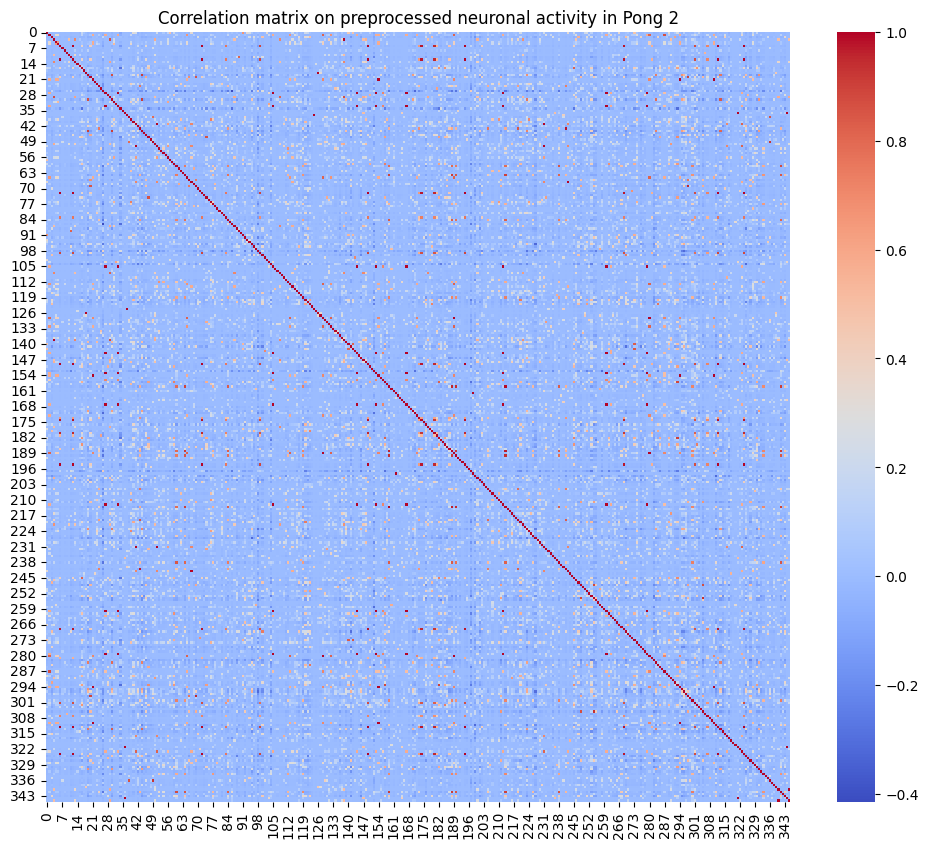

In [80]:
correlation_matrix = new_new_activity_pong2.corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation matrix on preprocessed neuronal activity in Pong 2')
plt.show()

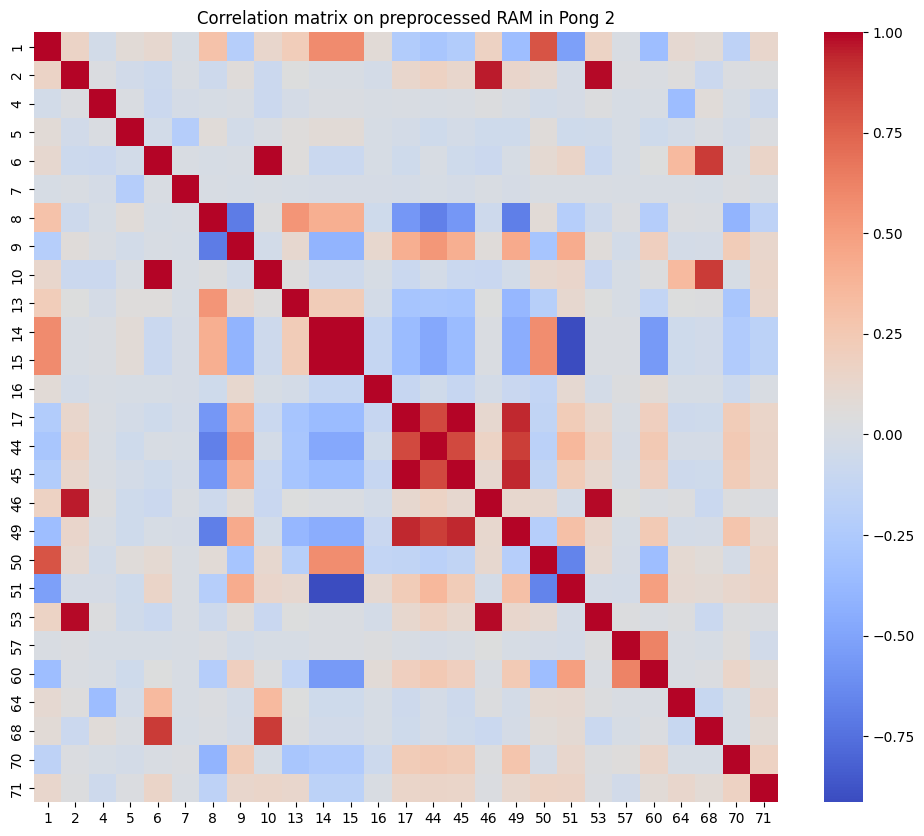

In [81]:
correlation_matrix = new_new_ram_pong2.corr(method='spearman')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation matrix on preprocessed RAM in Pong 2')
plt.show()

::: {.callout-tip}
#### Follow-up idea
Create a correlation matrix aka heatmap that compares neuronal activity to RAM.
:::

## Plot activations as neuronal activity

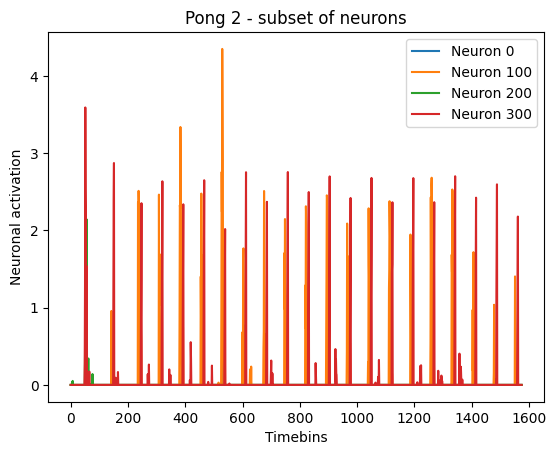

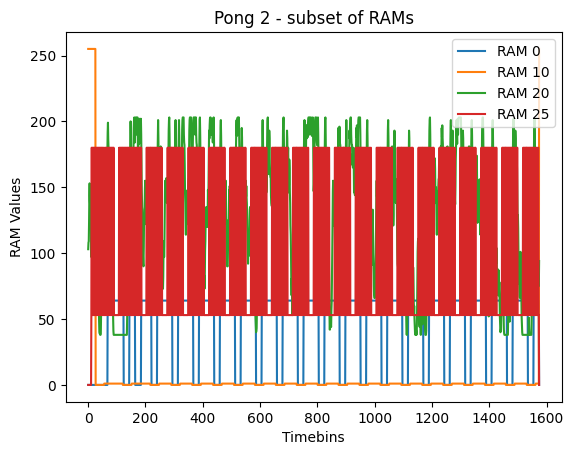

In [82]:
#| layout-ncol: 2

time = np.arange(len(new_new_activity_pong2))

plt.figure()
for i in [0, 100, 200, 300]:
    plt.plot(time, new_new_activity_pong2.iloc[:, i], label=f'Neuron {i}')

plt.xlabel('Timebins')
plt.ylabel('Neuronal activation')
plt.title('Pong 2 - subset of neurons')
plt.legend()
plt.show()

plt.figure()
for i in [0, 10, 20, 25]:
    plt.plot(time, new_new_ram_pong2.iloc[:, i], label=f'RAM {i}')

plt.xlabel('Timebins')
plt.ylabel('RAM Values')
plt.title('Pong 2 - subset of RAMs')
plt.legend()
plt.show()

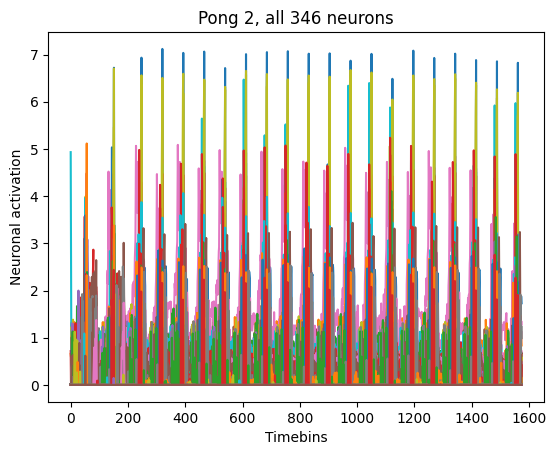

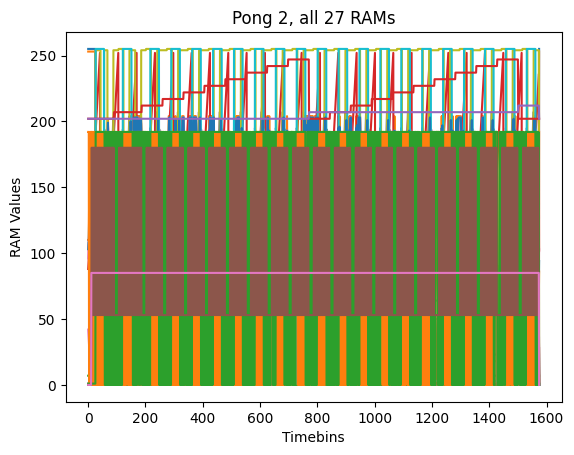

In [83]:
#| layout-ncol: 2

time = np.arange(len(new_new_activity_pong2))

plt.figure()
for i in range(new_new_activity_pong2.shape[1]):
    plt.plot(time, new_new_activity_pong2.iloc[:, i])

plt.xlabel('Timebins')
plt.ylabel('Neuronal activation')
plt.title(f'Pong 2, all {new_new_activity_pong2.shape[1]} neurons')
plt.show()

plt.figure()
for i in range(new_new_ram_pong2.shape[1]):
    plt.plot(time, new_new_ram_pong2.iloc[:, i])

plt.xlabel('Timebins')
plt.ylabel('RAM Values')
plt.title(f'Pong 2, all {new_new_ram_pong2.shape[1]} RAMs')
plt.show()

::: {.callout-tip}
#### Follow-up idea

Explore why there is some cyclic neuronal activity (it seems that the 20 peaks correspond to the 20 scores that agent scores). Also, there are several neurons who peaks once at the begining of the game at stay at the zero for the rest of game, you can explore those too. 
:::